## Loading our Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading our Dataset

We will import both train and test datasets:

In [385]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Exploring our datasets

First thing we want to do is get the top 5 rows of the train data

In [386]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Then check what our train dataset contains

In [387]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Our train dataset has 891 records and 12 columns. 

However, three columns contains some null data:
- Cabin: 687 nulls
- Age: 177 nulls
- Embarked: 2 nulls

Now let's see where we're having the missing data

In [255]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


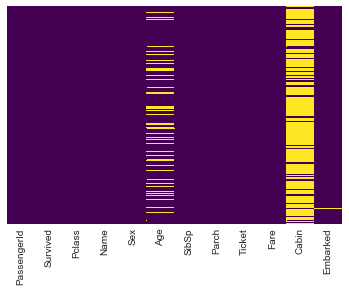

In [388]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Let's also check what our test dataset contains

In [389]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [258]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Our test dataset has 418 records and 11 columns. This gives us an idea that about 2/3 of our total dataset is set as Train data and about 1/3 of total data is set as Test data.

We can also see that three columns which contains null data:
- Age: 86 nulls
- Fare: 1 nulls
- Cabin: 327 nulls

In [259]:
#For accessibility, I want to set PassengerId as the index of each dataset:
    
#train_data.set_index(['PassengerId'], inplace=True)
#test_data.set_index(['PassengerId'], inplace=True)

## Relationship between each features and survival

Now, we will analyze the relationship between different features and how it relates to Survival. We want to see how each feature affects people's chance of survival.

### Pclass VS Survived. 
First, let's compare the plot of those who survived against those who did not 

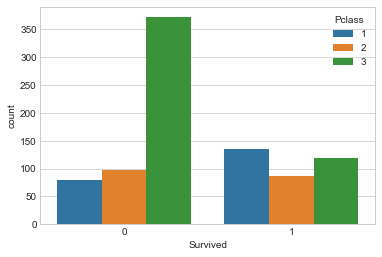

In [390]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

From the countlot, we notice how most people Pclass3 did no survive. This could probably be cause Pclass was the cheapest class. We will find out as we go further. For now, let's go ahead to visualize the Pclass for only those who survived.

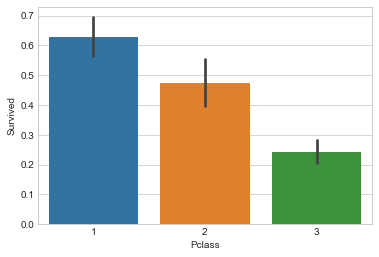

In [391]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

Form the plot, we can observer that most people who survived were in Pclass one. This could probably be the case of the higher you pay, the better your chances of survival. One would also guess that those who paid more (Pclass 1) were given more preference.

In [262]:
# On Kaggle, we will fit the model (X_train + y) and then make a prediction using X_test. 
#Which will create csv list ready to upload to Kaggle competition. We submitted the file and the result is:

# from sklearn.tree import DecisionTreeClassifier

# dtree = DecisionTreeClassifier()
# X_train = train_data[['Pclass']]
# y = train_data['Survived']
# X_test = test_data[['Pclass']]
# dtree.fit(X_train,y)
# prediction = dtree.predict(X_test)
# trainPrediction = pd.DataFrame(data=prediction, index = test_data.index.values, columns=['Survived'])
# # pred_csv = trainPrediction.to_csv()
# print(trainPrediction)

### Sex VS Survived

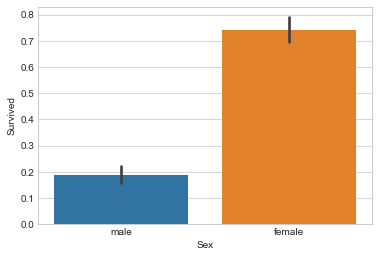

In [392]:
sns.set_style('whitegrid')

sns.barplot(x='Sex', y='Survived', data=train_data)

We can see that in general, most people who survived were female and most male didn't survive.

Let's also compare them based on the Passenger class (Pclass)

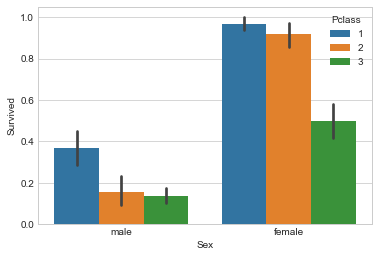

In [393]:
sns.set_style('whitegrid')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

From the above plot, we can observe that:

    Women from 1st and 2nd Pclass have almost 100% survival chance.
    Men from 2nd and 3rd Pclass have less than 20% survival chance.



In [394]:
# Again, let's see how how prediction has improved when we add the Sex column to it

# from sklearn.tree import DecisionTreeClassifier

# dtree = DecisionTreeClassifier()
# X_train = train_data[['Pclass', 'Sex']]
# y = train_data['Survived']
# X_test = test_data[['Pclass', 'Sex']]
# dtree.fit(X_train,y)
# prediction = dtree.predict(X_test)
# trainPrediction = pd.DataFrame(data=prediction, index = test_data.index.values, columns=['Survived'])
# # pred_csv = trainPrediction.to_csv()
# print(trainPrediction)

Now let's see how Age distribution affects Survival chance
### Age VS Survived

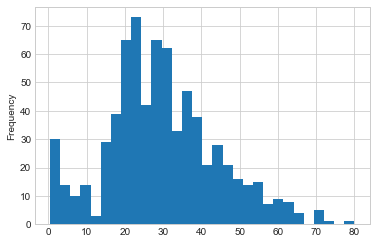

In [395]:
train_data['Age'].plot.hist(bins=30)

As we can observe, most people who survived were between 20 and 30. The older you get, the lesser your chances of survival. Remember there were missing data in the Age column? Let's fill in those missing data before we go ahead with our exploration. 

#### Fill-in the missing age data 
What will do is to fill in the average age for each Pclass as opposed to just using the mean of the overall age. We will perform this process for both train and test set since both have missing data.

For the train data:

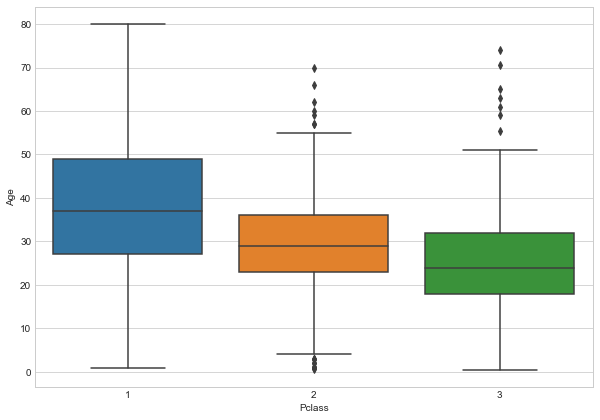

In [396]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train_data)

We can see that when we separated by PClass, the wealthier passengers in Pclass 1 and 2 were older than those in Pclass 3. We can use this segregation to fill-in the missing ages instead of using the overall mean of the ages.

In [397]:
def input_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [398]:
train_data['Age']= train_data[['Age', 'Pclass']].apply(input_ages, axis=1)

Now let's go back and confirm that there are no more missing data in the Age column for the train dataset.

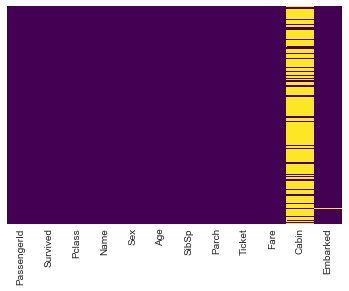

In [399]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As we can observe, see there no more missing data in the Age column.

Let's do same for the test data:

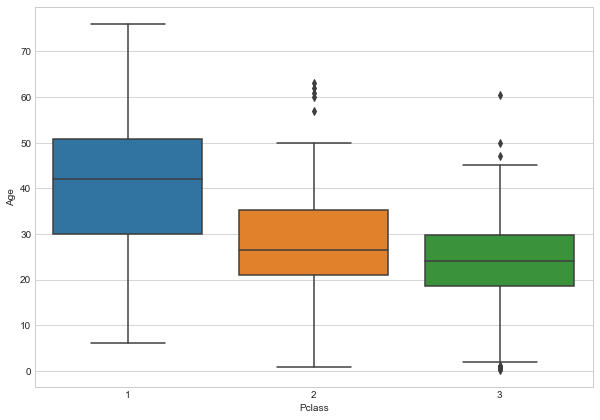

In [400]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test_data)

In [401]:
def test_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 42
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age

In [402]:
#The test dataset also had missing age data, so we replicate the same.
test_data['Age']= test_data[['Age', 'Pclass']].apply(test_ages, axis=1)

### SibSp VS Survived

This column shows number of siblings or spouses a passenger had onboard.

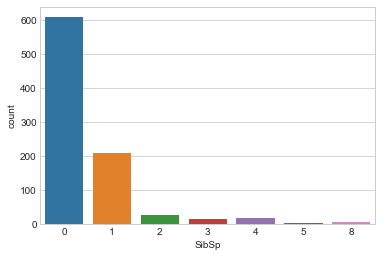

In [403]:
sns.countplot(x='SibSp', data=train_data)

Now, let's see how this affects their survival chance.

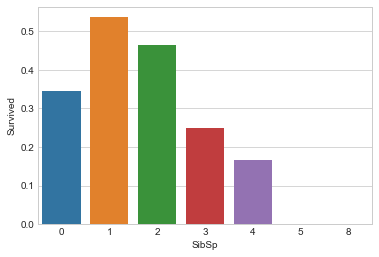

In [404]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train_data)

From our plot, we notice that people with just one spouse or sibling had about 50% chance. Infact, we can infer that this column does not directly impact one's chance of survival. So we may not be using it for our prediction

### Parch VS Survived

This column shows number of children/parents a passenger had onboard. Let's see how this impact survival chance.

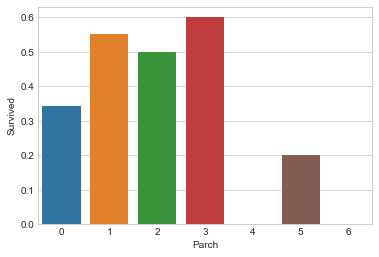

In [405]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train_data)

From our plot, people with 1-3 family members on board had better chances of survial than those who do not.

### Fare VS Survival
Let's see how the cost of fare affects people's survival chance. I'm speculating that the higher your fare, the higher your survival chance.

Text(0.5,0,'Fare')

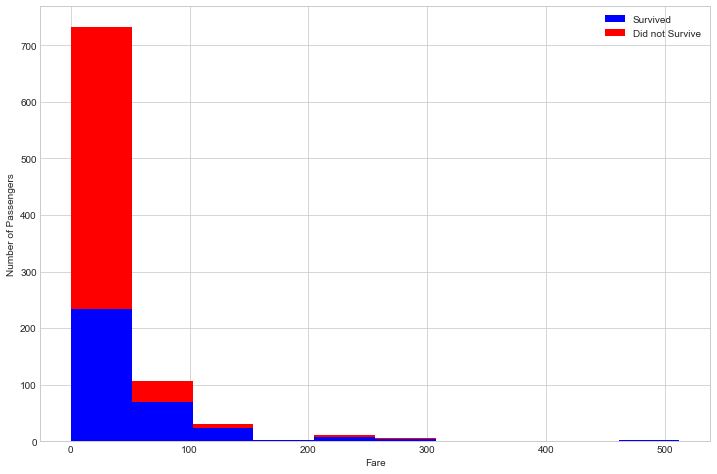

In [406]:
plt.figure(figsize=(12,8))


plt.hist([train_data[train_data['Survived']==1]['Fare'], train_data[train_data['Survived']==0]['Fare']], stacked=True, color = ['b','r'],
         bins = 10,label = ['Survived','Did not Survive'])
plt.legend()
plt.ylabel('Number of Passengers')
plt.xlabel('Fare')


Wow! It looks like most passengers paid between 0 and 50 for the Fare. Infact, we saw it earlier that most passengers who did not survive were in Pclass3. Hence Pclass3 was the cheapest class, and had most people who did not survive.

Remember that our test dataset had a missing Fare value, so we need to fill that missing datapoint. We will do this by finding the mean of similar passengers from the same Pclass, Embarked and Parch then assign it's mean value to that missing datapoint.

In [407]:
nullFare = test_data[test_data.Fare.isnull()].index.values
test_data.loc[nullFare]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [409]:
test_data.loc[nullFare,'Fare']
test_data.loc[nullFare,'Fare'] = test_data[(test_data.Parch == 0) & (test_data.Pclass ==3 ) & (test_data.Embarked == 'S')].Fare.mean()
# test_data.loc[[1044]]
test_data.loc[nullFare]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,9.921892,NaN,S


### Embarked VS Survived
Does the place where departure point impact passengers chance? 

There are three departure points: C = Cherbourg, Q = Queenstown, S = Southampton.

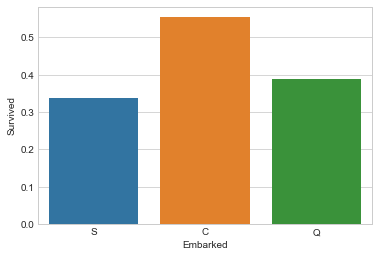

In [410]:
sns.barplot(x='Embarked', y='Survived', ci=None, data=train_data)

Before we go futher, we need to fill in the two missing values of the Embarked column. 

Instead of dropping those missing values, we will assume that 'Fare' and 'Pclass' are dependent on the port where the passengers 'Embarked' on the journey. Hence, we can use that information to predict the departure port of the two missing values:

In [411]:
indexEmbarked = train_data[train_data.Embarked.isnull()].index.tolist()
for indEmb in indexEmbarked:
    fareEmbarked = train_data.loc[indEmb].Fare.mean()
    predictedEmbarked = train_data[(train_data.Fare < fareEmbarked*1.1) &
                           (train_data.Fare > fareEmbarked*0.9) &
                           (train_data.Pclass == train_data.loc[indEmb].Pclass)].Embarked.mode()
    train_data.loc[indEmb,'Embarked'] = predictedEmbarked[0]
    print(predictedEmbarked)   

0    C
1    S
dtype: object
0    C
dtype: object


From our prediction, one passenger of from Cherbourg, and the other is from Southampton. Let's map these values to our DataFrame

In [412]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
# train_data = train_data.loc[1:891,:]

Now let's confirm if Embarked still has Null values

In [413]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Cabin VS Survived
Let's take a look at the cabin column

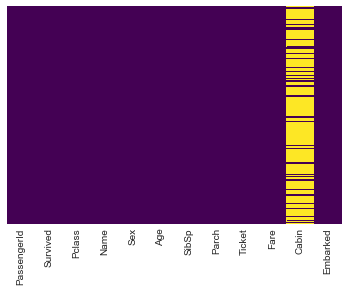

In [414]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The cabin column as too many missing columns, and it's not particularly important for this prediction so we will drop it.

In [415]:
train_data.drop('Cabin', axis=1, inplace=True )

test_data.drop('Cabin', axis=1, inplace=True )

In [416]:
#Let's confirm that we no longer have the cabin column 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


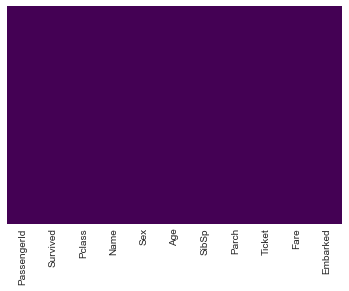

In [417]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

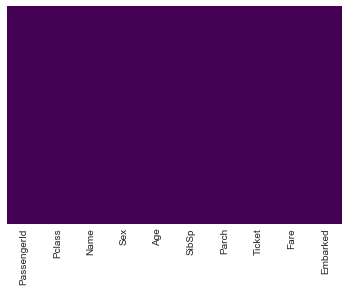

In [418]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Visualizing both dataset, it looks like we now have a clean dataset. No missing datapoints, we are good to go!

### Sex

Next step is to deal with categorical features like te sex. We need to transform it's data into 0 and 1 so that the Machine Learning model can take it in and make meaning from it. We will do this by creating dummy columns:

In [419]:
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_data.head()

#fullData = pd.concat([train_data,test_data])
#fullData['Sex'] = fullData['Sex'].map({'male': 0, 'female': 1}).astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


We're going to get rid of PassengerId, Name and Ticket columns as we will not be needing them.

In [420]:
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [421]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


Then repeat same for the test data:

In [422]:
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [423]:
#We also need to convert Embarked column for the test data.
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)

test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


## Selecting a Classifier

We will test using a number of classifiers then choose the best one for further fitting.

For now, let's split our Train data into new train/test set:

In [424]:
from sklearn.model_selection import train_test_split
X_train = train_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
# X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
X_test = test_data.drop("PassengerId", axis=1).copy()

y = train_data['Survived']

X_NewTrain, X_NewTest, y_NewTrain, y_NewTest = train_test_split(X_train, y, test_size=0.33, random_state=1410)

Now find the best score using different classifiers:

In [425]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [426]:
#Logistic Regression

logReg = LogisticRegression()
logReg.fit(X_NewTrain, y_NewTrain)

y_prediction = logReg.predict(X_NewTest)
acc_log_reg = round( logReg.score(X_NewTrain, y_NewTrain) * 100, 2)
print (str(acc_log_reg) + ' percent')

81.71 percent


In [427]:
#Support Vector Machine (SVM)

sv = SVC()
sv.fit(X_NewTrain, y_NewTrain)
y_pred_svc = sv.predict(X_NewTest)
acc_svc = round(sv.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_svc)

91.44


In [428]:
#Linear SVM

lsvc = LinearSVC()
lsvc.fit(X_NewTrain, y_NewTrain)
y_pred_linear_svc = lsvc.predict(X_NewTest)
acc_linear_svc = round(lsvc.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_linear_svc)

81.38


In [429]:
#k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_NewTrain, y_NewTrain)
y_pred_knn = knn.predict(X_NewTest)
acc_knn = round(knn.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_knn)

84.4


In [430]:
#Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_NewTrain, y_NewTrain)
y_pred_dt = dtc.predict(X_NewTest)
acc_dt = round(dtc.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_dt)

98.99


In [431]:
#Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_NewTrain, y_NewTrain)
y_pred_rf = rf.predict(X_NewTest)
acc_rf = round(rf.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_rf)

98.99


In [432]:
#Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_NewTrain, y_NewTrain)
y_pred_gnb = gnb.predict(X_NewTest)
acc_gnb = round(gnb.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_gnb)

79.19


In [433]:
#Perceptron

pcn = Perceptron(max_iter=5, tol=None)
pcn.fit(X_NewTrain, y_NewTrain)
y_pred_pcn = pcn.predict(X_NewTest)
acc_pcn = round(pcn.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_pcn)

70.64


In [434]:
#Stochastic Gradient Descent (SGD)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_NewTrain, y_NewTrain)
y_pred_sgd = sgd.predict(X_NewTest)
acc_sgd = round(sgd.score(X_NewTrain, y_NewTrain) * 100, 2)
print (acc_sgd)

73.99


In [435]:
#Confusion Matrix

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_NewTrain, y_NewTrain)
y_pred_rf = rf.predict(X_NewTest)
acc_rf = round(rf.score(X_NewTrain, y_NewTrain) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

print("Confusion Matrix: ")
print(confusion_matrix(y_NewTest, y_pred_rf))

print("Classification report: ")
print(classification_report(y_NewTest, y_pred_rf))

Accuracy: 98 % 

Confusion Matrix: 
[[159  24]
 [ 38  74]]
Classification report: 
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       183
          1       0.76      0.66      0.70       112

avg / total       0.79      0.79      0.79       295



## Comparing Models

In [437]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_dt, acc_rf, acc_gnb, 
              acc_pcn, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.99
5,Random Forest,98.83
1,Support Vector Machines,91.44
3,KNN,84.40
0,Logistic Regression,81.71
2,Linear SVC,81.38
6,Naive Bayes,79.19
8,Stochastic Gradient Decent,73.99
7,Perceptron,70.64


From the above table, we can see that Decision Tree and Random Forest classfiers have the highest accuracy score.

Among these two, we choose Random Forest classifier because it has the ability to limit overfitting when compared to Decision Tree classifier.


In [447]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [443]:
#Create a submission file for kaggle
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_rf
    })
#Comment this on kaggle:
submission.to_csv('submission.csv', index=False)

KeyError: 'PassengerId'

In [446]:
test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [440]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearSVC()]

for cls in classifiers:
    name = cls.__class__.__name__
    cls.fit(X_NewTrain, y_NewTrain)
    prediction = cls.predict(X_NewTest)
    rank = pd.DataFrame(data=np.column_stack([prediction, y_NewTest]),
                                index=X_NewTest.index.values,columns=['Predicted','Actual'])
    accurracy = np.sum(rank.Predicted.values == rank.Actual.values)
    accurracy = accurracy/len(y_NewTest)
    print(accurracy, name)

0.6983050847457627 KNeighborsClassifier
0.6813559322033899 SVC
0.7694915254237288 DecisionTreeClassifier
0.7966101694915254 RandomForestClassifier
0.8 AdaBoostClassifier
0.8101694915254237 GradientBoostingClassifier
0.7864406779661017 GaussianNB
0.7796610169491526 LogisticRegression
0.7084745762711865 LinearSVC
